## Exploratory Data Analysis

    1. Get a better understanding of the study variable.
    2. Final cleaning tasks

In [57]:
""" Import packages """
import sys
import logging
import warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.insert(0, '../scripts/')

logging.basicConfig(filename='../logs/eda.log', filemode='a',
                    encoding='utf-8', level=logging.DEBUG)

warnings.filterwarnings("ignore")

In [56]:
from explorer import DataTransformer
from dataframe_info_extractor import DataFrameInfo
from utils_cleaner import DataFrameCleaner
from utils_plots import EDAPlots

transformer = DataTransformer()
plotmaker = EDAPlots()

In [58]:
REPO = "./"
filepath = "../data/cleaned/study_dataset.csv"

### Importing

In [59]:
data = transformer.load_data(ext="csv", filepath=filepath, repo=REPO, header=0, parse_dates=["Date"])
data.head()

,Date,Cases,Deaths_df3,Deaths0_4,Deaths5_14,Deaths15_49,Deaths50_69,Deaths70p,ITN,Presumed cases,...,Population in urban agglomerations of more than 1 million (% of total population),"Population, total",Renewable energy consumption (% of total final energy consumption),Total greenhouse gas emissions (kt of CO2 equivalent),Urban population,Urban population (% of total population)_df9,Urban population growth (annual %)_df9,Participated in MVIP,Participated in RTS Trials,Participated in R21 Trials
0,2000-12-31,603.210999,235.128065,874.845987,25.571181,62.627879,450.176799,717.149334,0.0,352587,...,7.749025,11882888.0,85.40,15984.91011,2120383.0,17.844,6.857565,0,0,0
1,2001-12-31,601.937744,256.009859,918.916428,27.686540,66.619251,469.845175,876.388458,0.0,352587,...,8.086915,12249764.0,85.49,15108.11122,2271106.0,18.540,6.867020,0,0,0
2,2002-12-31,595.852051,260.730606,958.846796,29.485652,72.230232,505.134949,743.621255,0.0,1188870,...,8.437518,12632269.0,85.43,15786.33044,2432722.0,19.258,6.874386,0,0,0
3,2003-12-31,585.123291,271.081041,965.412955,29.644367,72.615529,508.274478,881.413820,1.9,1443184,...,8.800698,13030591.0,85.30,19200.72446,2605597.0,19.996,6.865103,0,0,0
4,2004-12-31,562.411316,264.250419,925.186169,27.621911,71.165711,498.971133,873.945620,0.0,1528388,...,9.177370,13445977.0,85.31,19733.29397,2790981.0,20.757,6.873132,0,0,0


Drop "Average precipitation in depth (mm per year)". Its value is constant in almost all the countries (BFA, GHA, MWI and NGA)

In [60]:
datacleaner = DataFrameCleaner(data)
datacleaner.drop_columns(['Average precipitation in depth (mm per year)'])
data = datacleaner.data

In [61]:
datainfo = DataFrameInfo(data)

In [62]:
datainfo.get_dimension()

 There are 115 rows and 46 columns


In [63]:
datainfo.get_percent_missing()

The dataset contains 0.0 % missing values.


### Splitting the data per country for exploration

In [64]:
data.ISO3.unique()

array(['BFA', 'GHA', 'KEN', 'MWI', 'NGA'], dtype=object)

In [65]:
bfa, gha, ken, mwi, nga = datacleaner.split_in_subframes("ISO3")

In [66]:
bfacleaner, ghacleaner, kencleaner, mwicleaner, ngacleaner = [DataFrameInfo(frame) for frame in [bfa, gha, ken, mwi, nga]]

In [67]:
bfa.columns

Index(['Date', 'Cases', 'Deaths_df3', 'Deaths0_4', 'Deaths5_14', 'Deaths15_49',
       'Deaths50_69', 'Deaths70p', 'ITN', 'Presumed cases', 'Total cases',
       'ITN Access Population (%)', 'Precipitation', 'Min Temperature', 'ISO3',
       'Surface Temperature Change', 'Access to electricity (% of population)',
       'Agricultural land (% of land area)', 'Agricultural land (sq. km)',
       'Agriculture, forestry, and fishing, value added (% of GDP)',
       'Annual freshwater withdrawals, total (% of internal resources)',
       'Annual freshwater withdrawals, total (billion cubic meters)',
       'Arable land (% of land area)',
       'CO2 emissions (kg per 2015 US$ of GDP)',
       'CO2 emissions (kg per 2017 PPP $ of GDP)',
       'CO2 emissions (kg per PPP $ of GDP)', 'CO2 emissions (kt)',
       'CO2 emissions (metric tons per capita)',
       'Cereal yield (kg per hectare)',
       'Foreign direct investment, net inflows (% of GDP)',
       'Forest area (% of land area)', 'Fo

In [68]:
### Renaming the columns

potential_targets = ['Cases', 'Deaths_df3', 'Deaths0_4', 'Deaths5_14', 'Deaths15_49',
       'Deaths50_69', 'Deaths70p', 'Presumed cases', 'Total cases']

potential_features = ['ITN', 'ITN Access Population (%)', 'Precipitation', 'Min Temperature',
       'Surface Temperature Change', 'Access to electricity (% of population)',
       'Agricultural land (% of land area)', 'Agricultural land (sq. km)',
       'Agriculture, forestry, and fishing, value added (% of GDP)',
       'Annual freshwater withdrawals, total (% of internal resources)',
       'Annual freshwater withdrawals, total (billion cubic meters)',
       'Arable land (% of land area)',
       'CO2 emissions (kg per 2015 US$ of GDP)',
       'CO2 emissions (kg per 2017 PPP $ of GDP)',
       'CO2 emissions (kg per PPP $ of GDP)', 'CO2 emissions (kt)',
       'CO2 emissions (metric tons per capita)',
       'Cereal yield (kg per hectare)',
       'Foreign direct investment, net inflows (% of GDP)',
       'Forest area (% of land area)', 'Forest area (sq. km)',
       'Methane emissions (kt of CO2 equivalent)',
       'Mortality rate, under-5 (per 1,000 live births)',
       'Nitrous oxide emissions (thousand metric tons of CO2 equivalent)',
       'Population growth (annual %)',
       'Population in urban agglomerations of more than 1 million (% of total population)',
       'Population, total',
       'Renewable energy consumption (% of total final energy consumption)',
       'Total greenhouse gas emissions (kt of CO2 equivalent)',
       'Urban population', 'Urban population (% of total population)_df9',
       'Urban population growth (annual %)_df9', 'Participated in MVIP',
       'Participated in RTS Trials', 'Participated in R21 Trials']

new_column_names = {i: f"Target_{potential_targets.index(i)+1}" for i in potential_targets}
features_names = {i: f"Feature_{potential_features.index(i)+1}" for i in potential_features}

new_column_names.update(features_names)
new_column_names

{'Cases': 'Target_1',
 'Deaths_df3': 'Target_2',
 'Deaths0_4': 'Target_3',
 'Deaths5_14': 'Target_4',
 'Deaths15_49': 'Target_5',
 'Deaths50_69': 'Target_6',
 'Deaths70p': 'Target_7',
 'Presumed cases': 'Target_8',
 'Total cases': 'Target_9',
 'ITN': 'Feature_1',
 'ITN Access Population (%)': 'Feature_2',
 'Precipitation': 'Feature_3',
 'Min Temperature': 'Feature_4',
 'Surface Temperature Change': 'Feature_5',
 'Access to electricity (% of population)': 'Feature_6',
 'Agricultural land (% of land area)': 'Feature_7',
 'Agricultural land (sq. km)': 'Feature_8',
 'Agriculture, forestry, and fishing, value added (% of GDP)': 'Feature_9',
 'Annual freshwater withdrawals, total (% of internal resources)': 'Feature_10',
 'Annual freshwater withdrawals, total (billion cubic meters)': 'Feature_11',
 'Arable land (% of land area)': 'Feature_12',
 'CO2 emissions (kg per 2015 US$ of GDP)': 'Feature_13',
 'CO2 emissions (kg per 2017 PPP $ of GDP)': 'Feature_14',
 'CO2 emissions (kg per PPP $ of G

In [69]:
# Renaming the columns
data = data.rename(columns=new_column_names).set_index(["ISO3", "Date"])
bfa = bfa.rename(columns=new_column_names).set_index(["ISO3", "Date"])
gha = gha.rename(columns=new_column_names).set_index(["ISO3", "Date"])
ken = ken.rename(columns=new_column_names).set_index(["ISO3", "Date"])
mwi = mwi.rename(columns=new_column_names).set_index(["ISO3", "Date"])
nga = nga.rename(columns=new_column_names).set_index(["ISO3", "Date"])

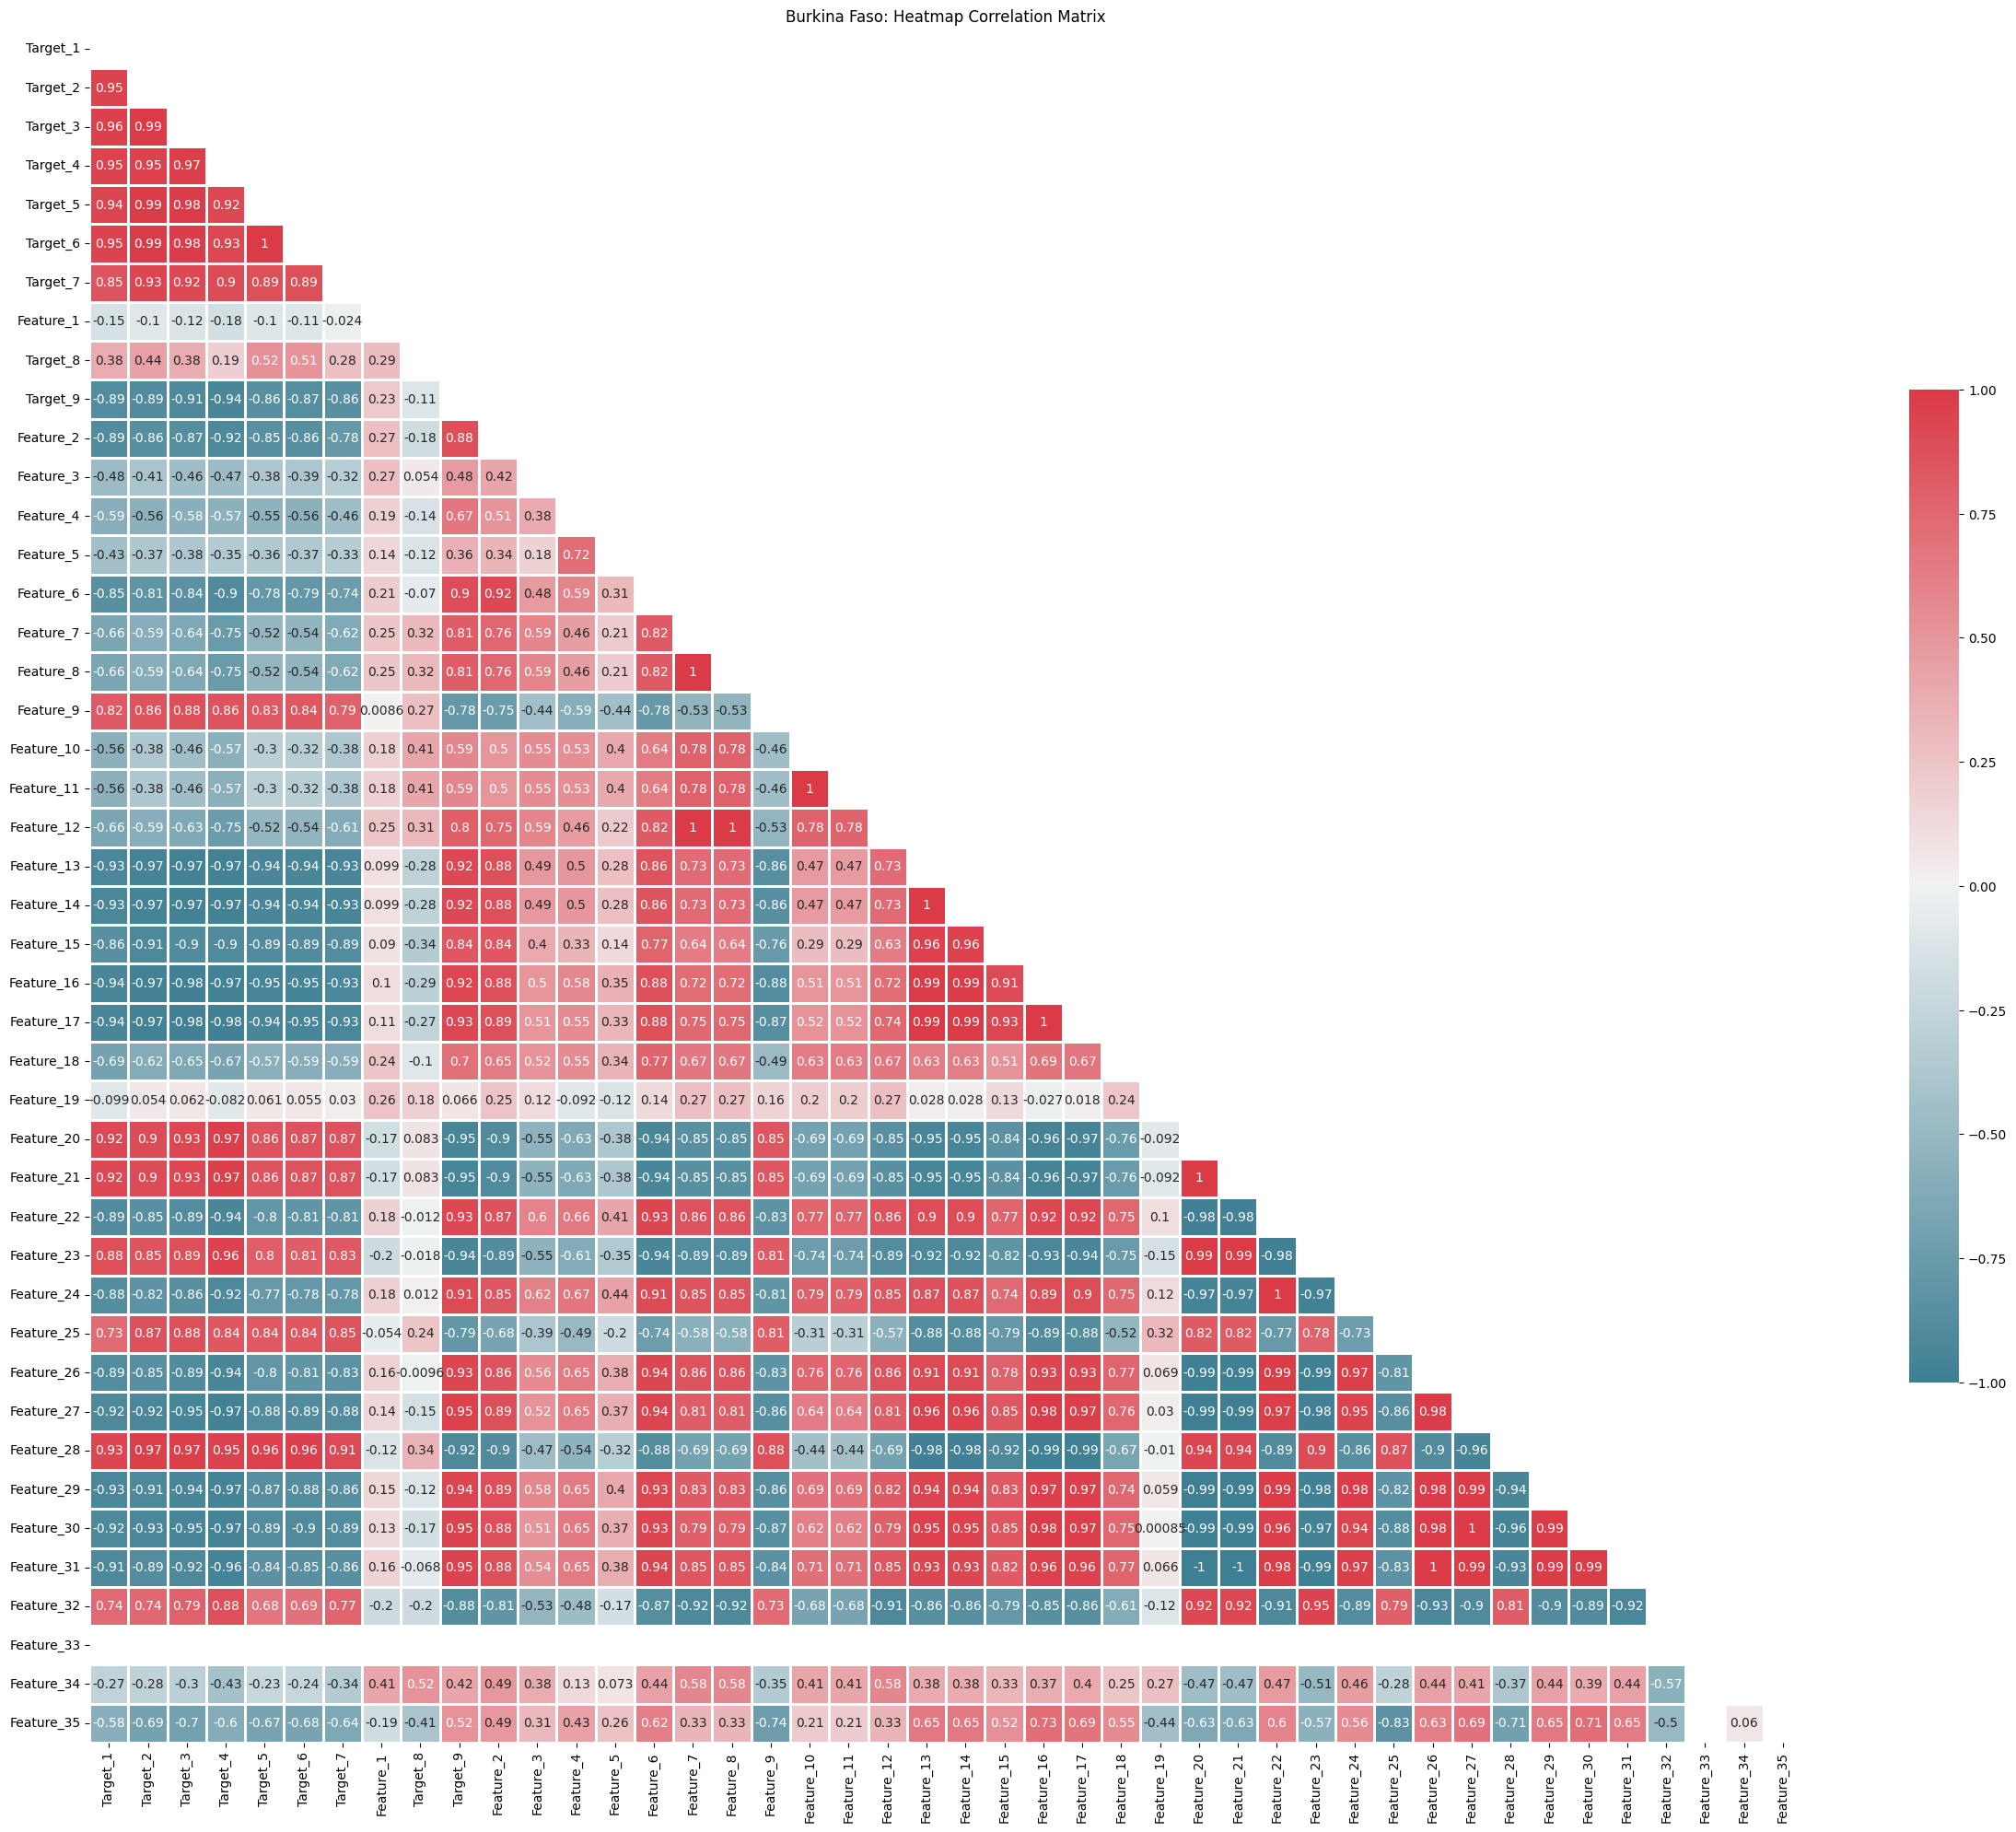

In [70]:
plotmaker.heatmap_correlation_matrix(bfa, figtitle="Heatmap Correlation Matrix", figname="heatmap_corr_mat", country="Burkina Faso")

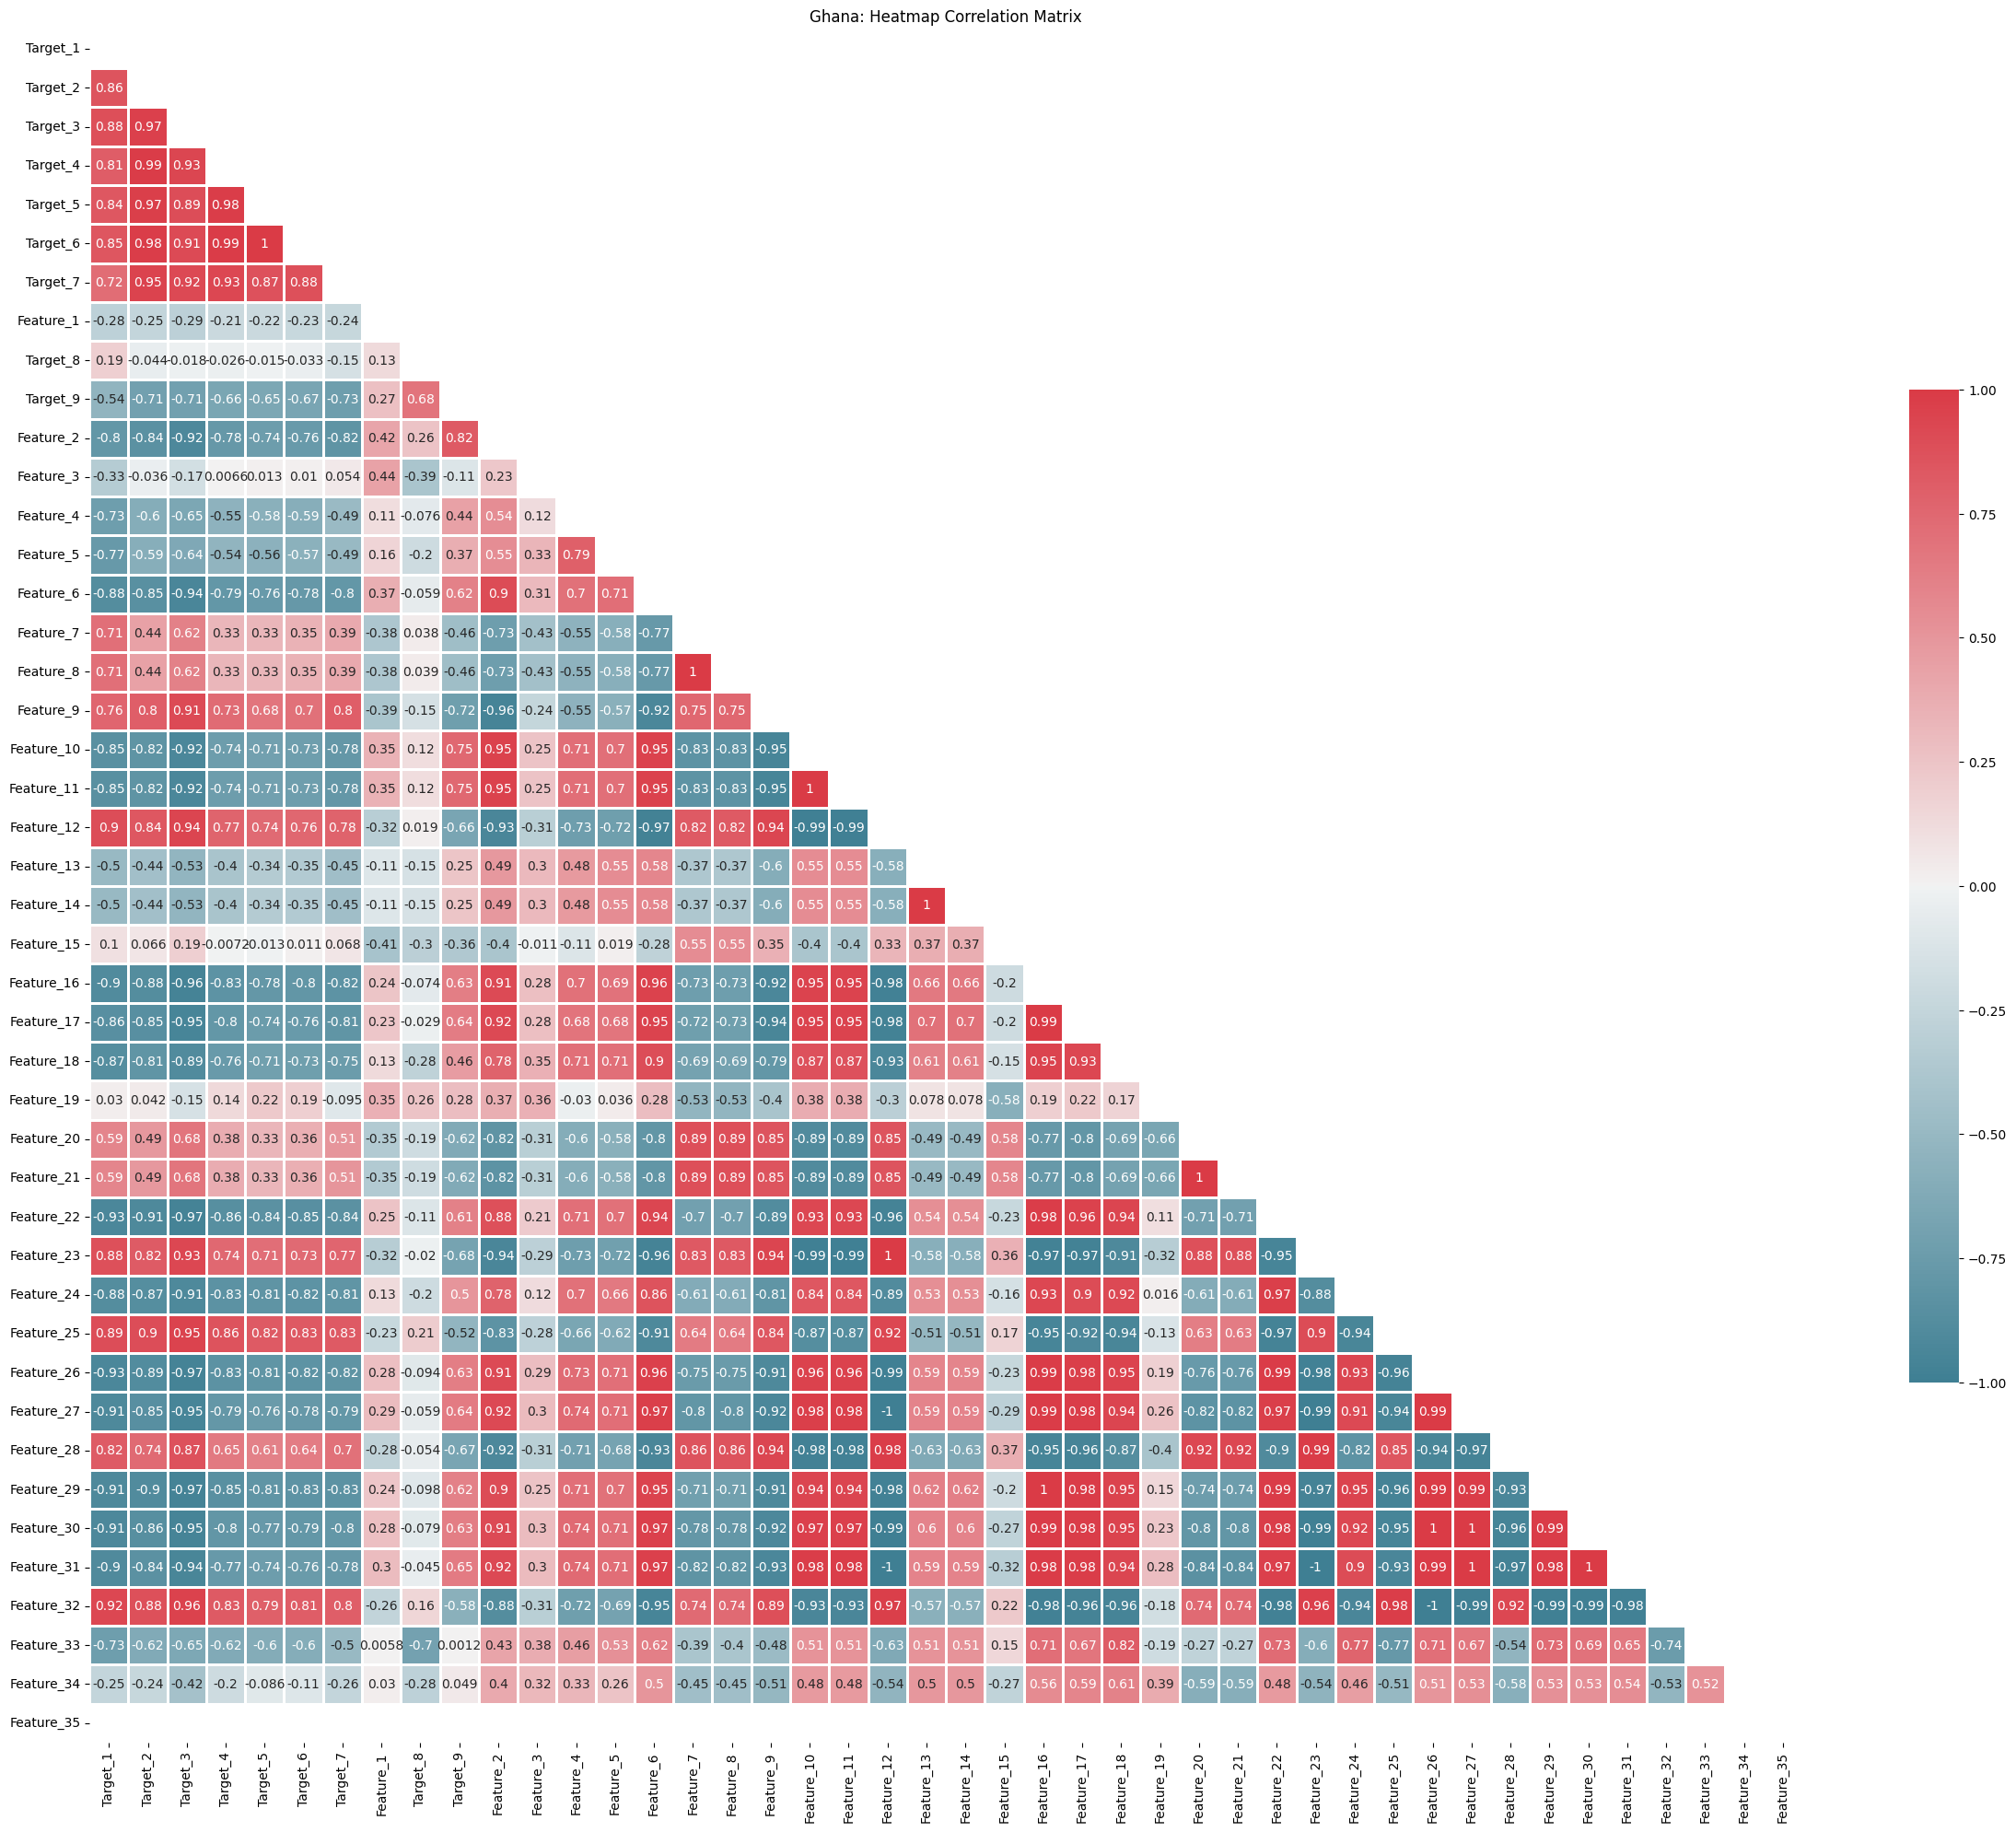

In [71]:
plotmaker.heatmap_correlation_matrix(gha, figtitle="Heatmap Correlation Matrix", figname="heatmap_corr_mat", country="Ghana")

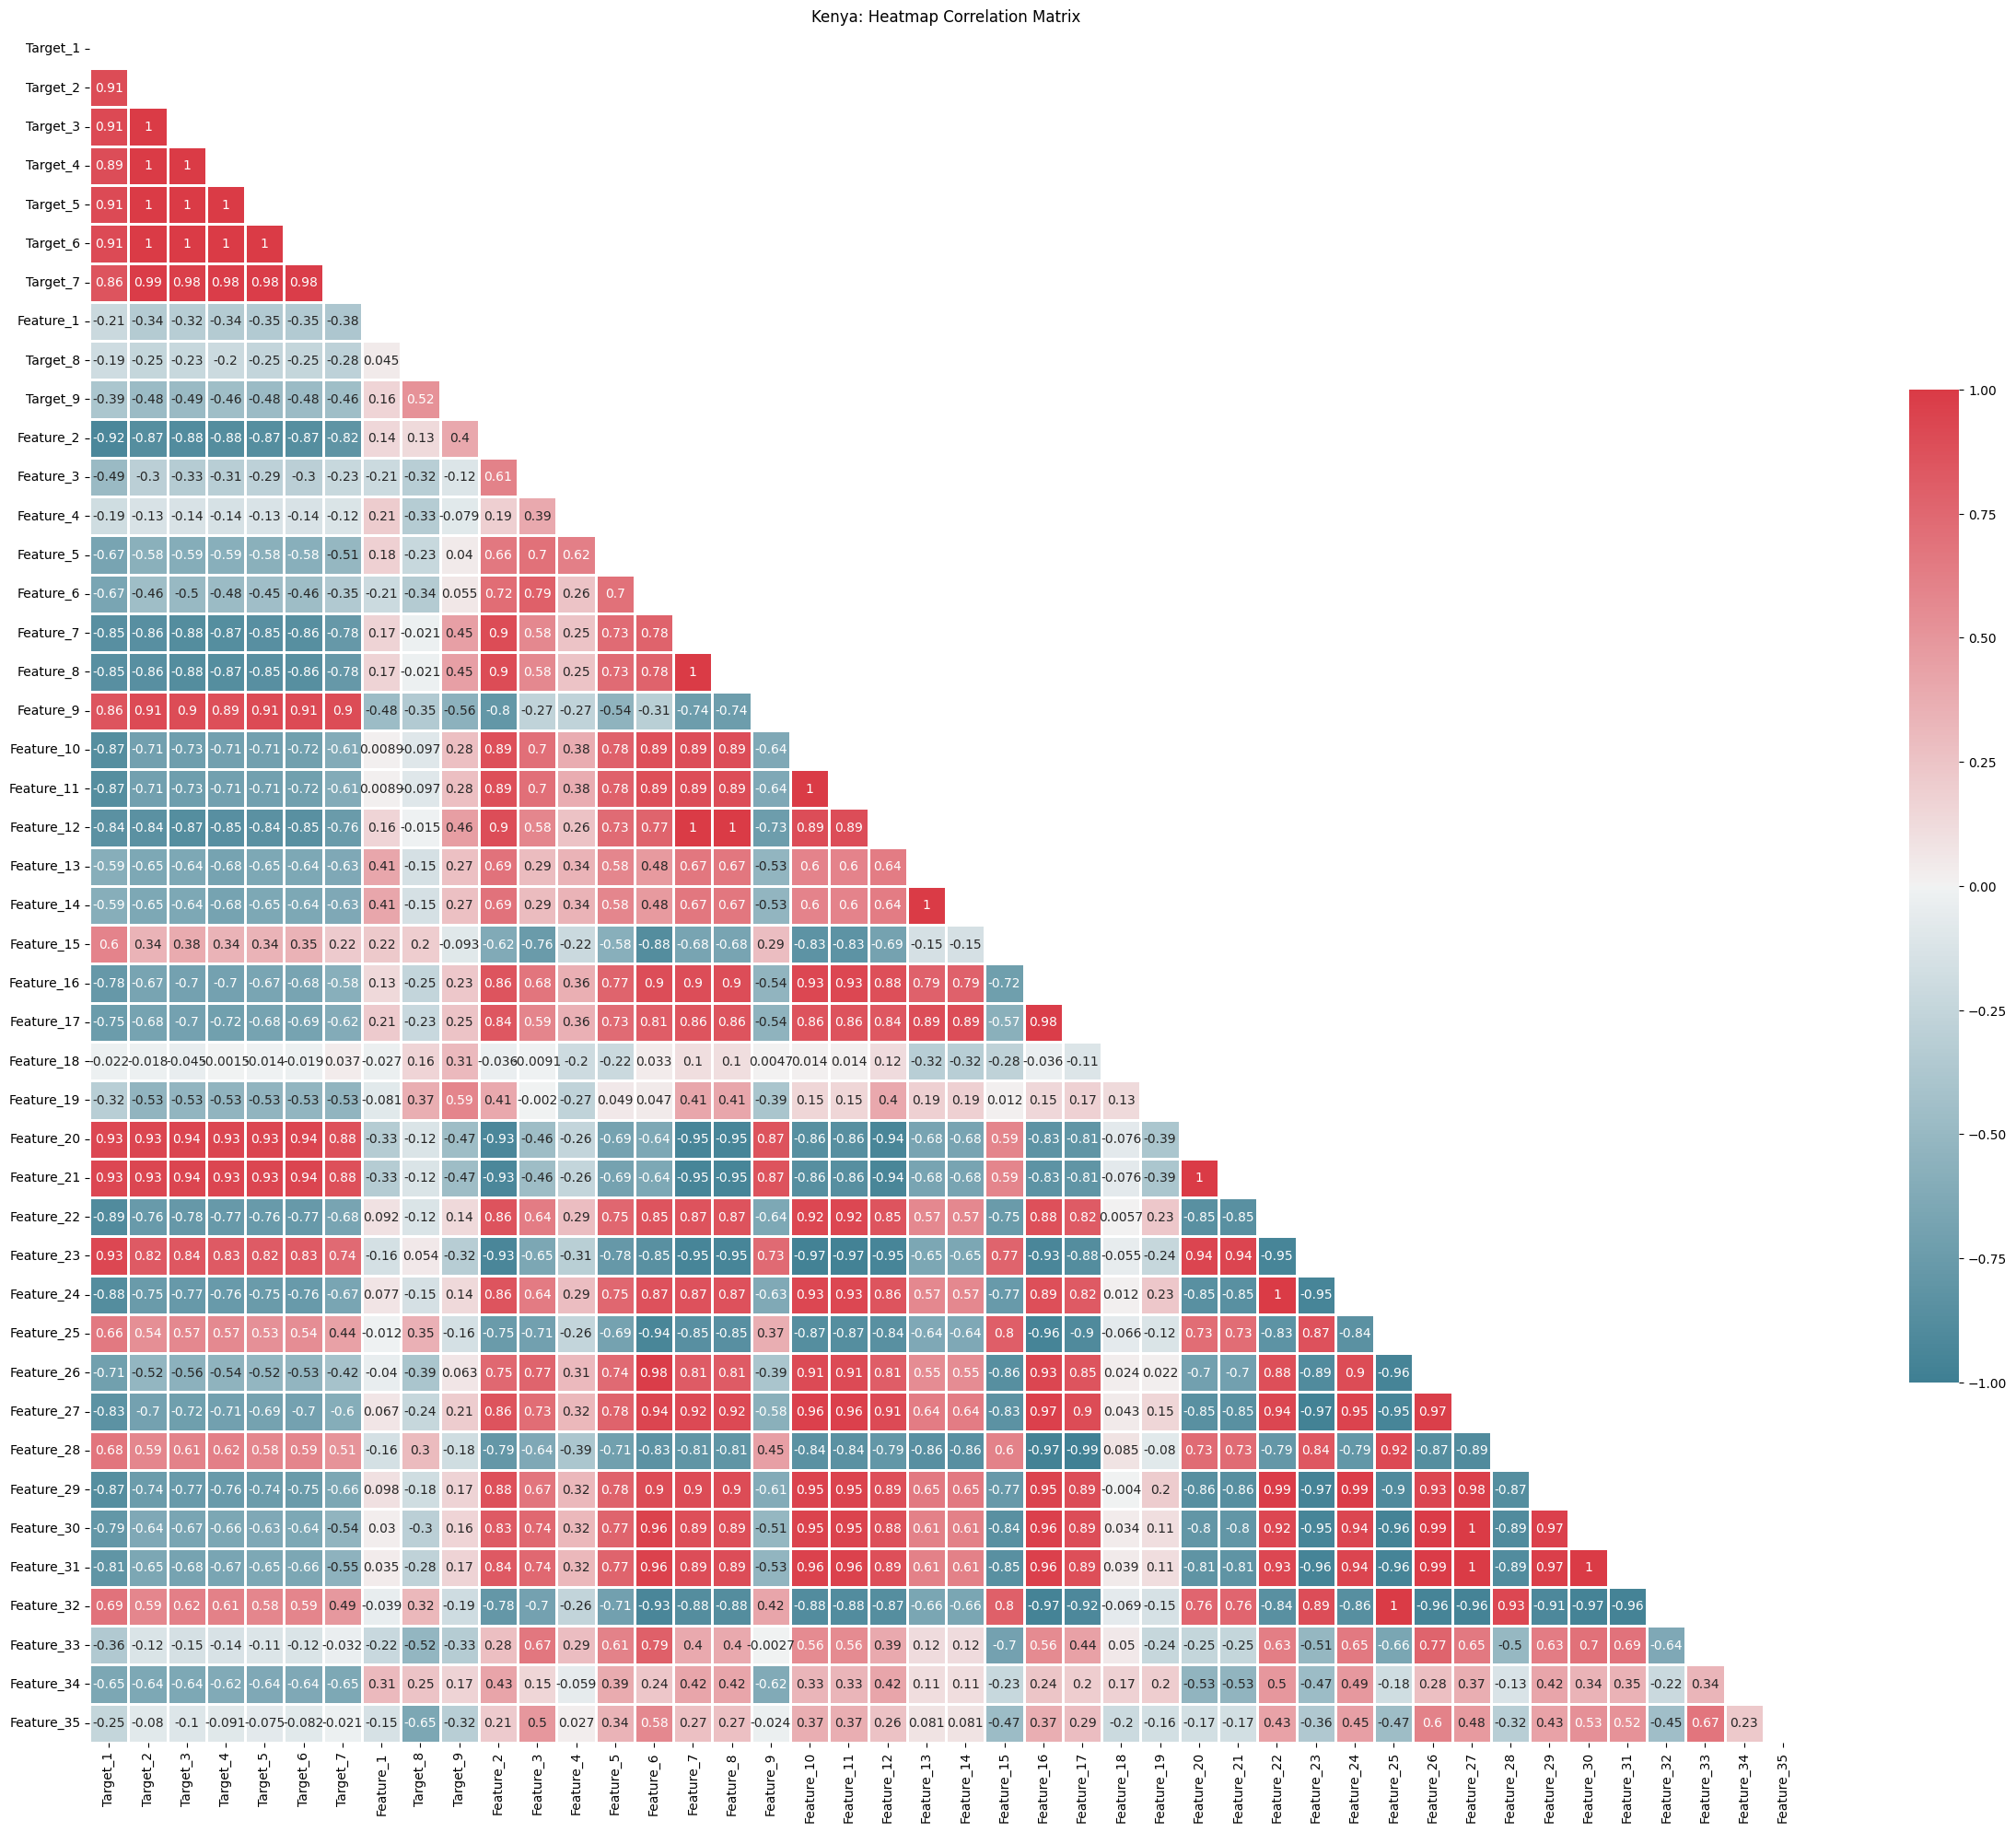

In [72]:
plotmaker.heatmap_correlation_matrix(ken, figtitle="Heatmap Correlation Matrix", figname="heatmap_corr_mat", country="Kenya")

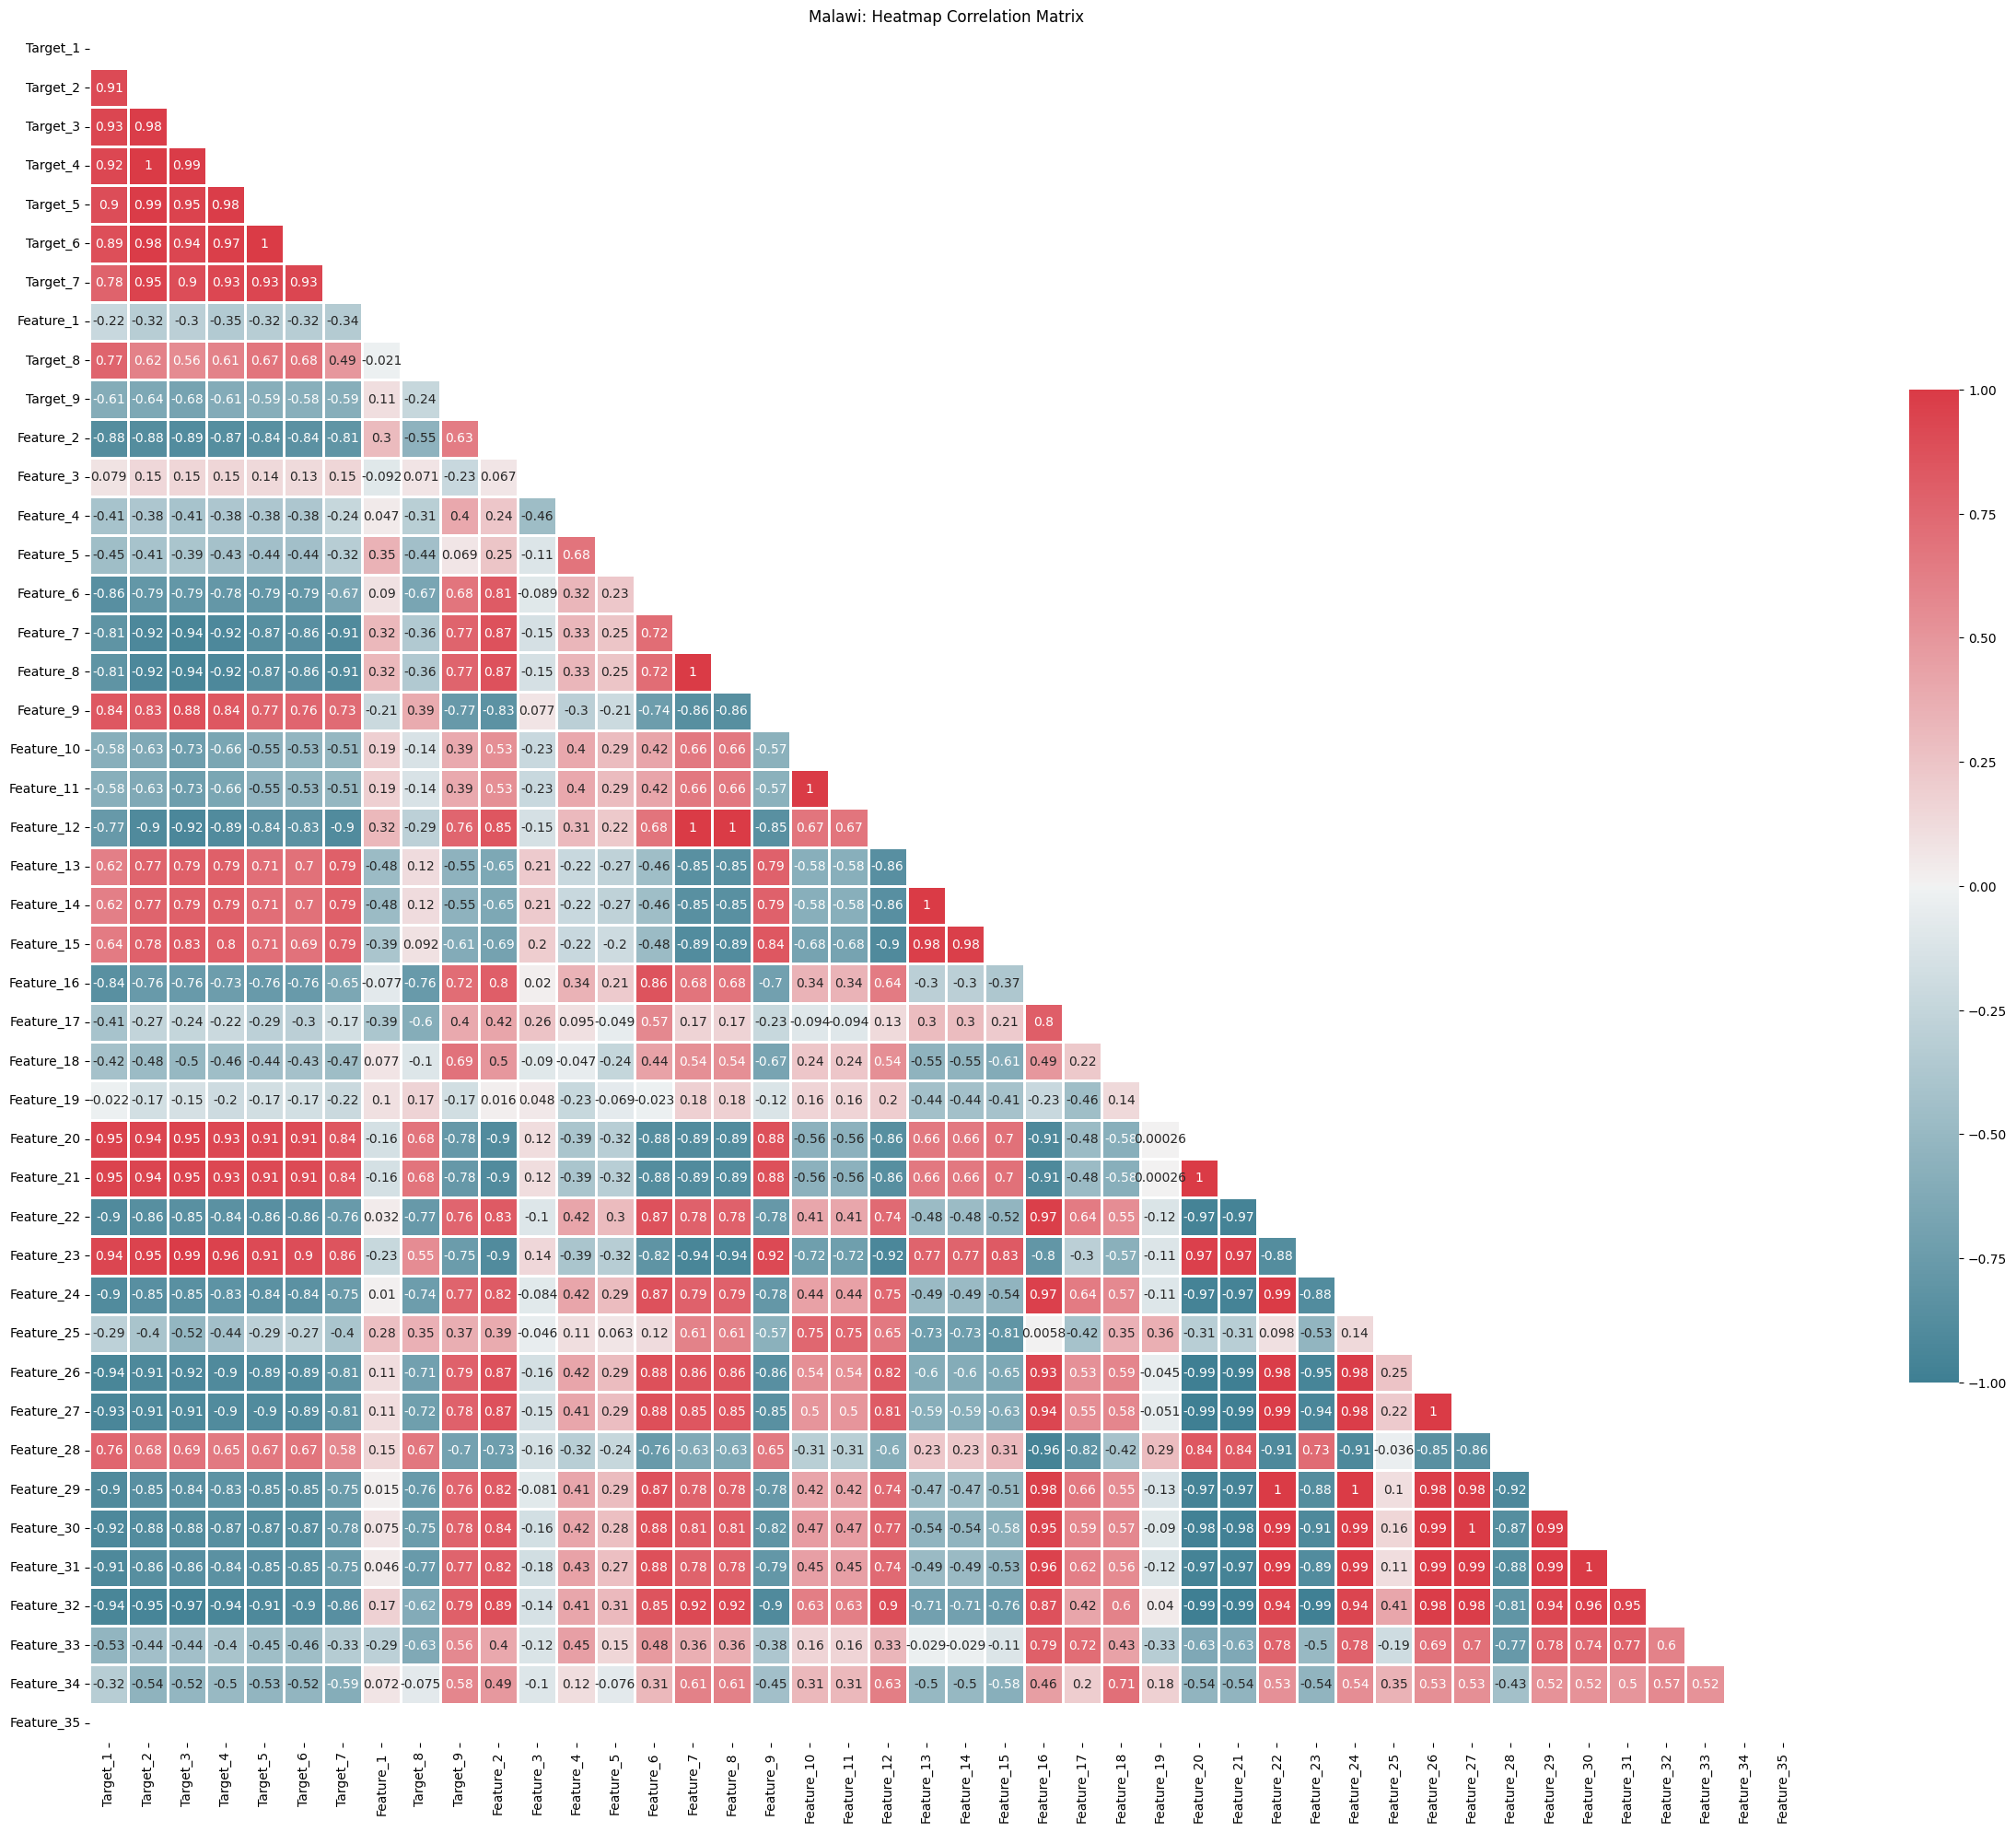

In [73]:
plotmaker.heatmap_correlation_matrix(mwi, figtitle="Heatmap Correlation Matrix", figname="heatmap_corr_mat", country="Malawi")

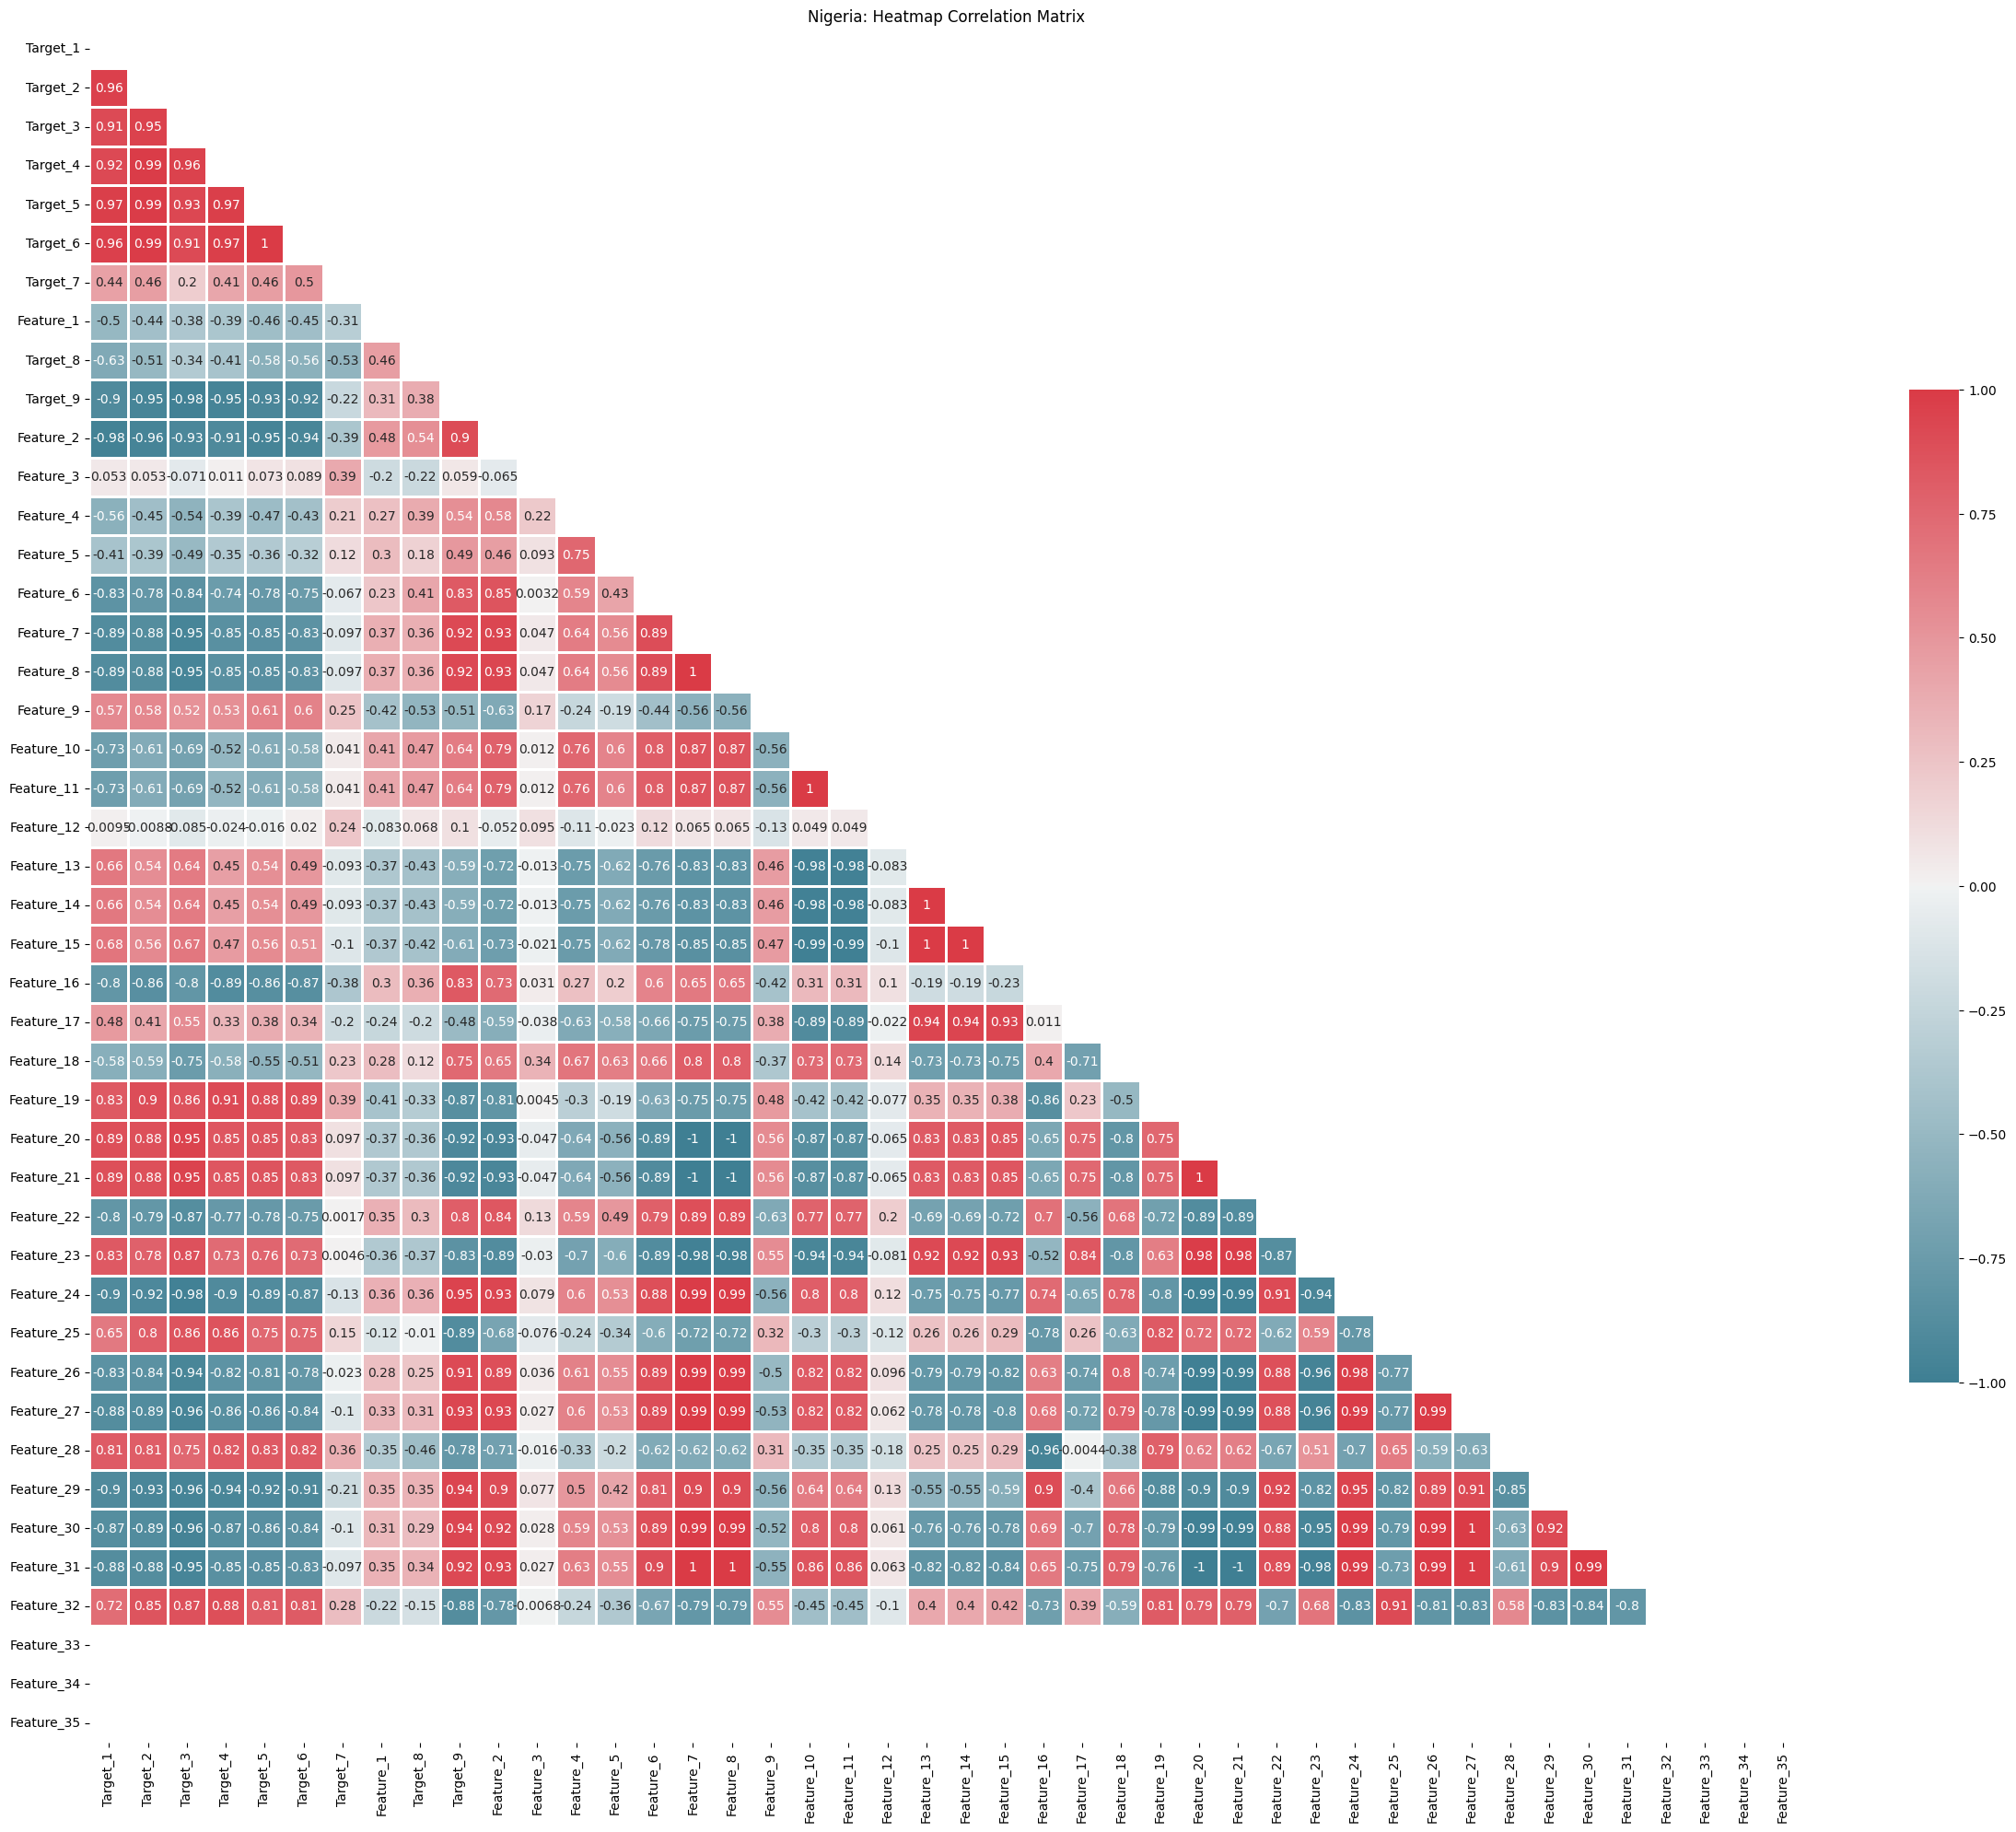

In [74]:
plotmaker.heatmap_correlation_matrix(nga, figtitle="Heatmap Correlation Matrix", figname="heatmap_corr_mat", country="Nigeria")

### Correlation matrices analysis and choice of study variables